# Train sizing
-----------------------

This example shows how to asses a model's performance based on the size of the training set.

The data used is a variation on the [Australian weather dataset](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) from Kaggle. You can download it from [here](https://github.com/tvdboom/ATOM/blob/master/examples/datasets/weatherAUS.csv). The goal of this dataset is to predict whether or not it will rain tomorrow training a binary classifier on target `RainTomorrow`.

## Load the data

In [1]:
# Import packages
import pandas as pd
from atom import ATOMClassifier

In [2]:
# Load the data
X = pd.read_csv("./datasets/weatherAUS.csv")

# Let's have a look
X.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,MelbourneAirport,18.0,26.9,21.4,7.0,8.9,SSE,41.0,W,SSE,...,95.0,54.0,1019.5,1017.0,8.0,5.0,18.5,26.0,Yes,0
1,Adelaide,17.2,23.4,0.0,NaN,NaN,S,41.0,S,WSW,...,59.0,36.0,1015.7,1015.7,NaN,NaN,17.7,21.9,No,0
2,Cairns,18.6,24.6,7.4,3.0,6.1,SSE,54.0,SSE,SE,...,78.0,57.0,1018.7,1016.6,3.0,3.0,20.8,24.1,Yes,0
3,Portland,13.6,16.8,4.2,1.2,0.0,ESE,39.0,ESE,ESE,...,76.0,74.0,1021.4,1020.5,7.0,8.0,15.6,16.0,Yes,1
4,Walpole,16.4,19.9,0.0,NaN,NaN,SE,44.0,SE,SE,...,78.0,70.0,1019.4,1018.9,NaN,NaN,17.4,18.1,No,0


## Run the pipeline

In [3]:
# Initialize atom and prepare the data
atom = ATOMClassifier(X, verbose=2, warnings=False, random_state=1)
atom.clean()
atom.impute(strat_num="median", strat_cat="most_frequent", max_nan_rows=0.8)
atom.encode()

<< ================== ATOM ================== >>
Algorithm task: binary classification.

Dataset stats ==================== >>
Shape: (142193, 22)
Scaled: False
Missing values: 316559 (10.1%)
Categorical features: 5 (23.8%)
Duplicate samples: 45 (0.0%)
-------------------------------------
Train set size: 113755
Test set size: 28438
-------------------------------------
|    |        dataset |          train |           test |
| -- | -------------- | -------------- | -------------- |
| 0  |   110316 (3.5) |    88412 (3.5) |    21904 (3.4) |
| 1  |    31877 (1.0) |    25343 (1.0) |     6534 (1.0) |

Applying data cleaning...
Fitting Imputer...
Imputing missing values...
 --> Dropping 15182 samples for containing more than 16 missing values.
 --> Imputing 100 missing values with median (12.2) in feature MinTemp.
 --> Imputing 57 missing values with median (22.8) in feature MaxTemp.
 --> Imputing 640 missing values with median (0.0) in feature Rainfall.
 --> Imputing 46535 missing values 

In [4]:
# Analyze the impact of the training set's size on a LightGBM model
atom.train_sizing("LGB", train_sizes=10, n_bootstrap=5)



Run: 0 ================================ >>
Size of training set: 10165 (10%)
Size of test set: 25359

Training ========================= >>
Models: LGB01
Metric: f1


Results for LightGBM:
Fit ---------------------------------------------
Train evaluation --> f1: 0.8093
Test evaluation --> f1: 0.61
Time elapsed: 0.828s
Bootstrap ---------------------------------------
Evaluation --> f1: 0.6054 ± 0.0034
Time elapsed: 2.412s
-------------------------------------------------
Total time: 3.240s


Final results ==================== >>
Duration: 3.240s
-------------------------------------
LightGBM --> f1: 0.6054 ± 0.0034 ~


Run: 1 ================================ >>
Size of training set: 20330 (20%)
Size of test set: 25359

Training ========================= >>
Models: LGB02
Metric: f1


Results for LightGBM:
Fit ---------------------------------------------
Train evaluation --> f1: 0.7328
Test evaluation --> f1: 0.6218
Time elapsed: 0.922s
Bootstrap -------------------------------------

## Analyze the results

In [5]:
# The results are now multi-index, where frac is the fraction
# of the training set used to fit the model. The model names
# end with the fraction as well (without the dot)
atom.results

,,metric_train,metric_test,time_fit,mean_bootstrap,std_bootstrap,time_bootstrap,time
frac,model,,,,,,,
0.1,LGB01,0.665031,0.635616,0.828s,0.605427,0.003379,2.412s,3.240s
0.2,LGB02,0.665031,0.635616,0.922s,0.616879,0.003871,3.122s,4.044s
0.3,LGB03,0.665031,0.635616,1.547s,0.618866,0.004363,3.924s,5.471s
0.4,LGB04,0.665031,0.635616,1.641s,0.622234,0.003582,4.047s,5.688s
0.5,LGB05,0.665031,0.635616,2.128s,0.624927,0.001810,5.939s,8.068s
0.6,LGB06,0.665031,0.635616,2.270s,0.628501,0.003582,5.329s,7.601s
0.7,LGB07,0.665031,0.635616,2.022s,0.629707,0.002465,5.479s,7.503s
0.8,LGB08,0.665031,0.635616,2.284s,0.630006,0.002926,6.165s,8.451s
0.9,LGB09,0.665031,0.635616,2.477s,0.631703,0.002354,6.774s,9.253s


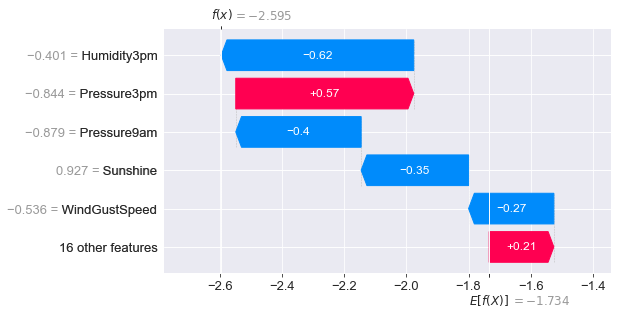

In [6]:
# Every model can be accessed through its name
atom.lgb05.waterfall_plot(show=6)

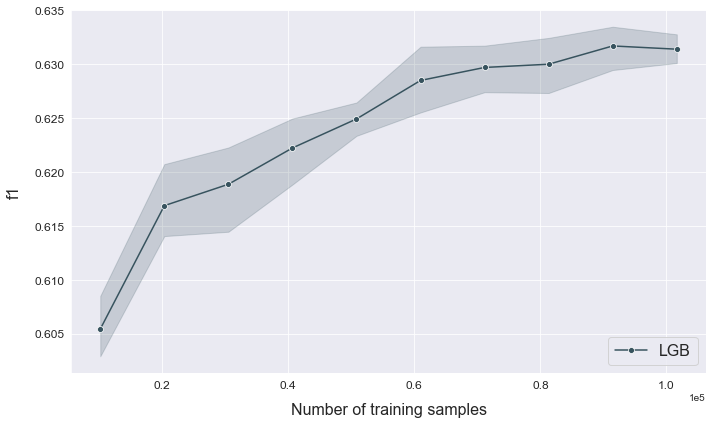

In [7]:
# Plot the train sizing's results
atom.plot_learning_curve()